## Carregamento dos dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(42)

df = pd.read_csv('D:\german_credit_data_with_risk.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Traduz o nome de cada coluna do dataset para pt-BR.

In [14]:
variaveis_en_br = {
    'Age': 'Idade',
    'Sex': 'Sexo',
    'Job': 'Trabalho',
    'Housing': 'Residencia',
    'Saving accounts': 'Conta poupanca',
    'Checking account': 'Conta corrente',
    'Credit amount': 'Credito solicitado',
    'Duration': 'Duracao',
    'Purpose': 'Motivo',
    'Risk': 'Risco'
}

df = df.rename(columns=variaveis_en_br)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1000 non-null   int64 
 1   Idade               1000 non-null   int64 
 2   Sexo                1000 non-null   object
 3   Trabalho            1000 non-null   int64 
 4   Residencia          1000 non-null   object
 5   Conta poupanca      817 non-null    object
 6   Conta corrente      606 non-null    object
 7   Credito solicitado  1000 non-null   int64 
 8   Duracao             1000 non-null   int64 
 9   Motivo              1000 non-null   object
 10  Risco               1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Traduz o valor de cada coluna para pt-BR.

In [7]:
df.loc[df['Sexo'] == 'male', 'Sexo'] = 'Masculino'
df.loc[df['Sexo'] == 'female', 'Sexo'] = 'Feminino'

df.loc[df['Residencia'] == 'own', 'Residencia'] = 'Propria'
df.loc[df['Residencia'] == 'free', 'Residencia'] = 'Gratuita'
df.loc[df['Residencia'] == 'rent', 'Residencia'] = 'Aluguel'

df.loc[df['Conta poupanca'] == 'little', 'Conta poupanca'] = 'Pouca'
df.loc[df['Conta poupanca'] == 'quite rich', 'Conta poupanca'] = 'Muito rica'
df.loc[df['Conta poupanca'] == 'rich', 'Conta poupanca'] = 'Rica'
df.loc[df['Conta poupanca'] == 'moderate', 'Conta poupanca'] = 'Media'

df.loc[df['Conta corrente'] == 'little', 'Conta corrente'] = 'Pouca'
df.loc[df['Conta corrente'] == 'moderate', 'Conta corrente'] = 'Media'
df.loc[df['Conta corrente'] == 'rich', 'Conta corrente'] = 'Rica'

df.loc[df['Motivo'] == 'radio/TV', 'Motivo'] = 'Radio/TV'
df.loc[df['Motivo'] == 'education', 'Motivo'] = 'Educacao'
df.loc[df['Motivo'] == 'furniture/equipment', 'Motivo'] = 'Moveis/Equipamentos'
df.loc[df['Motivo'] == 'car', 'Motivo'] = 'Carro'
df.loc[df['Motivo'] == 'business', 'Motivo'] = 'Negocio'
df.loc[df['Motivo'] == 'domestic appliances', 'Motivo'] = 'Eletrodomesticos'
df.loc[df['Motivo'] == 'repairs', 'Motivo'] = 'Concertos'
df.loc[df['Motivo'] == 'vacation/others', 'Motivo'] = 'Ferias/Outros'

df.loc[df['Risco'] == 'good', 'Risco'] = 'Bom'
df.loc[df['Risco'] == 'bad', 'Risco'] = 'Ruim'

df.head()

,Unnamed: 0,Idade,Sexo,Trabalho,Residencia,Conta poupanca,Conta corrente,Credito solicitado,Duracao,Motivo,Risco
0,0,67,Masculino,2,Propria,NaN,Pouca,1169,6,Radio/TV,Bom
1,1,22,Feminino,2,Propria,Pouca,Media,5951,48,Radio/TV,Ruim
2,2,49,Masculino,1,Propria,Pouca,NaN,2096,12,Educacao,Bom
3,3,45,Masculino,2,Gratuita,Pouca,Pouca,7882,42,Moveis/Equipamentos,Bom
4,4,53,Masculino,2,Gratuita,Pouca,Pouca,4870,24,Carro,Ruim


Testa duas abordagem de substituição de valorfes nulos para encontrar a maneira de gerar melhores resultados.

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

desconhecido = 'Desconhecido'

# Duas abordagens que serão validadas.
abordagens = {
    'constante': SimpleImputer(strategy='constant', fill_value=desconhecido),
    'moda': SimpleImputer(strategy='most_frequent'),
}

# Remove variável-alvo do dataset de entrada.
X = df.drop('Risco', axis=1)

# Cria dataset com as variaveis de saída.
y = df['Risco']

# Divide 80% dos dados para treinamento e 20% para teste dos resultados.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

colunas_ausentes = ['Conta poupanca', 'Conta corrente']

for abordagem, imputer in abordagens.items():
    X_treino_temp, X_teste_temp = X_treino.copy(), X_teste.copy()
    
    # Substitui os valores nulos por constante/moda.
    X_treino_temp[colunas_ausentes] = imputer.fit_transform(X_treino_temp[colunas_ausentes])
    X_teste_temp[colunas_ausentes] = imputer.fit_transform(X_teste_temp[colunas_ausentes])
    
    # Transforma variaveis categoricas em numericas.
    X_treino_temp = pd.get_dummies(X_treino_temp)
    X_teste_temp = pd.get_dummies(X_teste_temp)
    
    # Cria modelo de regressão logística.
    regressao_logistica = LogisticRegression(max_iter=1000)
    regressao_logistica.fit(X_treino_temp, y_treino)
    
    # Prevê os valores e compara com os valores esperados.
    y_prev = regressao_logistica.predict(X_teste_temp)
    accuracy = accuracy_score(y_teste, y_prev)
    
    print(f'Valores nulos substituídos por {abordagem} -> {accuracy}')

Valores nulos substituídos por constante -> 0.725
Valores nulos substituídos por moda -> 0.615


De acordo com o teste realizado acima a substituição de valores nulos por uma constante teve um resultado melhor, portanto essa abordagem foi utilizada no dataset.

In [15]:
# Imputando constante no lugar dos nulos.
df_constante = df.copy()
df_constante['Conta poupanca'].fillna(desconhecido, inplace=True)
df_constante['Conta corrente'].fillna(desconhecido, inplace=True)

# Imputando moda no lugar dos nulos.
df_moda = df.copy()
df_moda['Conta poupanca'].fillna(df_moda['Conta poupanca'].mode()[0], inplace=True)
df_moda['Conta corrente'].fillna(df_moda['Conta corrente'].mode()[0], inplace=True)

# Percebe-se que agora todas as colunas tem valor em todas as linhas.
df_constante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1000 non-null   int64 
 1   Idade               1000 non-null   int64 
 2   Sexo                1000 non-null   object
 3   Trabalho            1000 non-null   int64 
 4   Residencia          1000 non-null   object
 5   Conta poupanca      1000 non-null   object
 6   Conta corrente      1000 non-null   object
 7   Credito solicitado  1000 non-null   int64 
 8   Duracao             1000 non-null   int64 
 9   Motivo              1000 non-null   object
 10  Risco               1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [16]:
novo_df = df_constante

novo_df.head()

,Unnamed: 0,Idade,Sexo,Trabalho,Residencia,Conta poupanca,Conta corrente,Credito solicitado,Duracao,Motivo,Risco
0,0,67,Masculino,2,Propria,Desconhecido,Pouca,1169,6,Radio/TV,Bom
1,1,22,Feminino,2,Propria,Pouca,Media,5951,48,Radio/TV,Ruim
2,2,49,Masculino,1,Propria,Pouca,Desconhecido,2096,12,Educacao,Bom
3,3,45,Masculino,2,Gratuita,Pouca,Pouca,7882,42,Moveis/Equipamentos,Bom
4,4,53,Masculino,2,Gratuita,Pouca,Pouca,4870,24,Carro,Ruim


## Análise exploratória dos dados

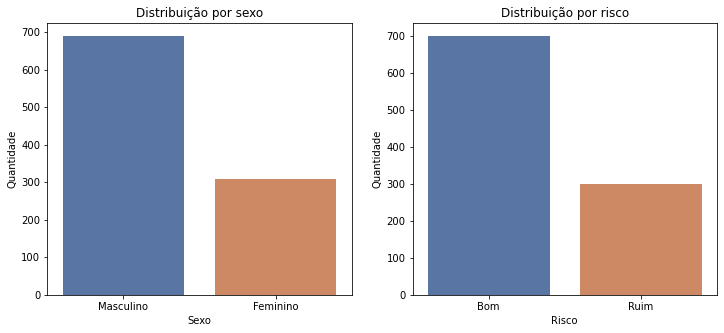

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=novo_df, x='Sexo', palette='deep', ax=axes[0])
axes[0].set(xlabel='Sexo', ylabel='Quantidade', title='Distribuição por sexo')

sns.countplot(data=novo_df, x='Risco', palette='deep', ax=axes[1])
axes[1].set(xlabel='Risco', ylabel='Quantidade', title='Distribuição por risco')

plt.show()

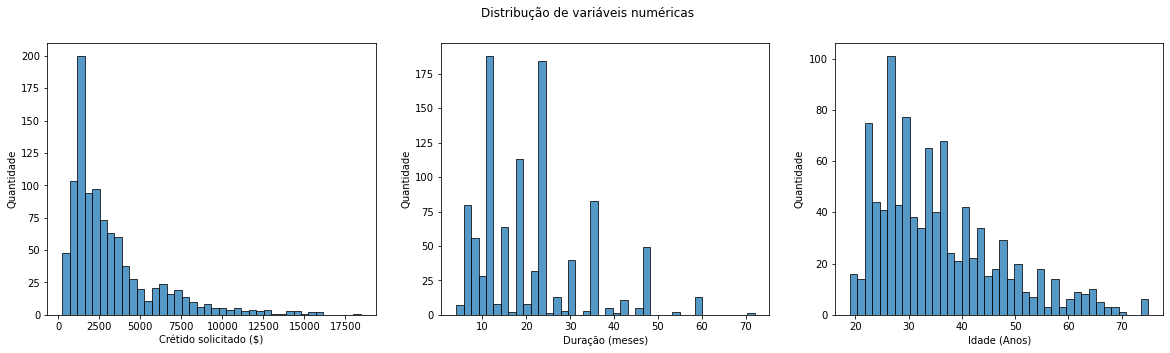

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distribução de variáveis numéricas')

sns.histplot(data=novo_df, x='Credito solicitado', ax=axes[0], palette='deep', bins=40)
axes[0].set(xlabel='Crétido solicitado ($)', ylabel='Quantidade')

sns.histplot(data=novo_df, x='Duracao', ax=axes[1], palette='deep', bins=40)
axes[1].set(xlabel='Duração (meses)', ylabel='Quantidade')

sns.histplot(data=novo_df, x='Idade', ax=axes[2], palette='deep', bins=40)
axes[2].set(xlabel='Idade (Anos)', ylabel='Quantidade')

plt.show()

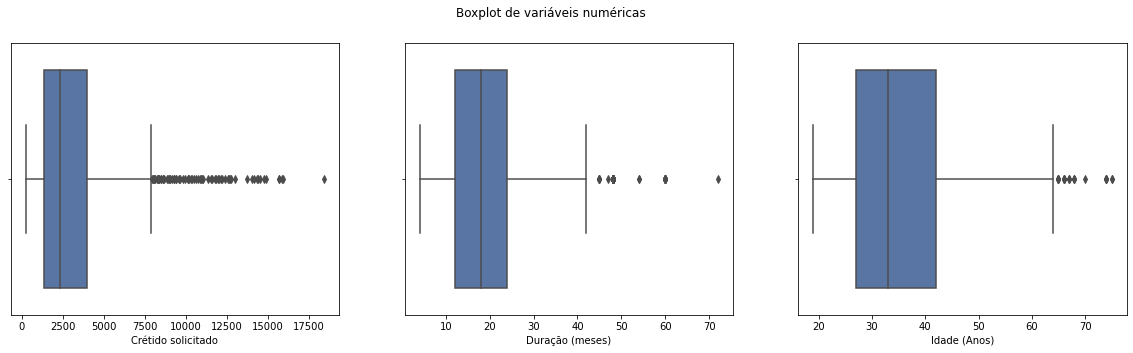

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Boxplot de variáveis numéricas')

sns.boxplot(data=novo_df, x='Credito solicitado', ax=axes[0], palette='deep')
axes[0].set(xlabel='Crétido solicitado')

sns.boxplot(data=novo_df, x='Duracao', ax=axes[1], palette='deep')
axes[1].set(xlabel='Duração (meses)')

sns.boxplot(data=novo_df, x='Idade', ax=axes[2], palette='deep')
axes[2].set(xlabel='Idade (Anos)')
            
plt.show()

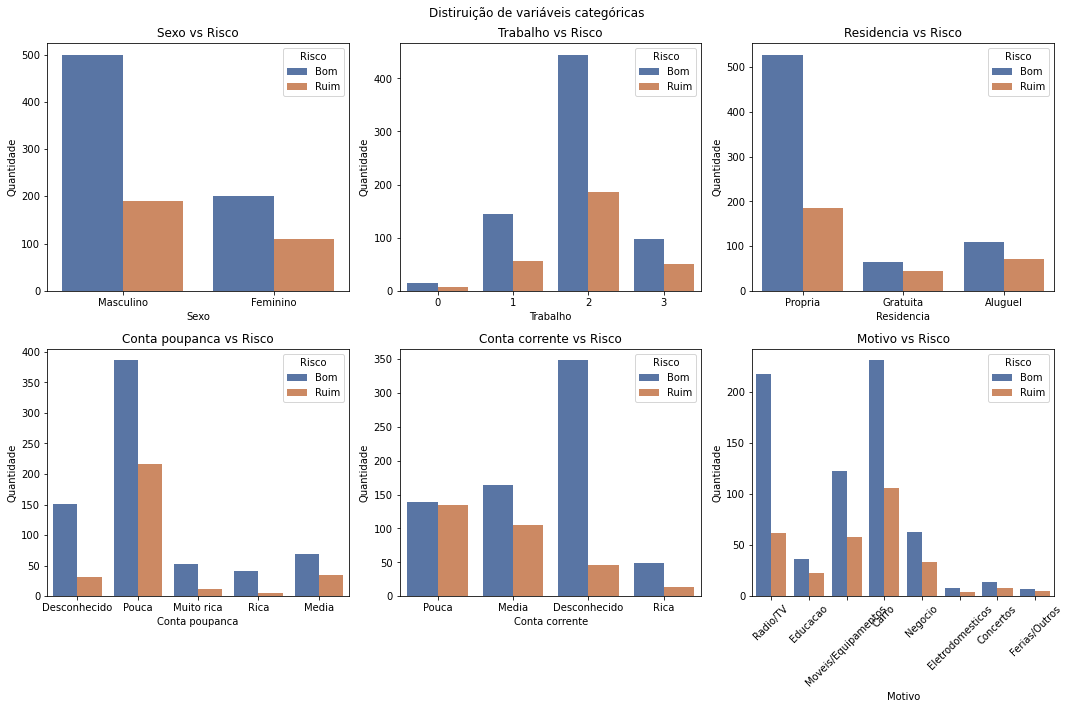

In [20]:
fig, axes= plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle('Distiruição de variáveis categóricas')

variaveis_categoricas = ['Sexo', 'Trabalho', 'Residencia', 'Conta poupanca', 'Conta corrente', 'Motivo']

for i, var in enumerate(variaveis_categoricas):    
    linha = i // 3
    coluna = i % 3
    
    sns.countplot(data=novo_df, x=var, hue='Risco', ax=axes[linha, coluna], palette='deep')
    axes[linha, coluna].set(title=f'{var} vs Risco', xlabel=var, ylabel='Quantidade')
    
    if var == 'Motivo':
        axes[linha, coluna].tick_params(axis='x', rotation=45)
    
plt.tight_layout()

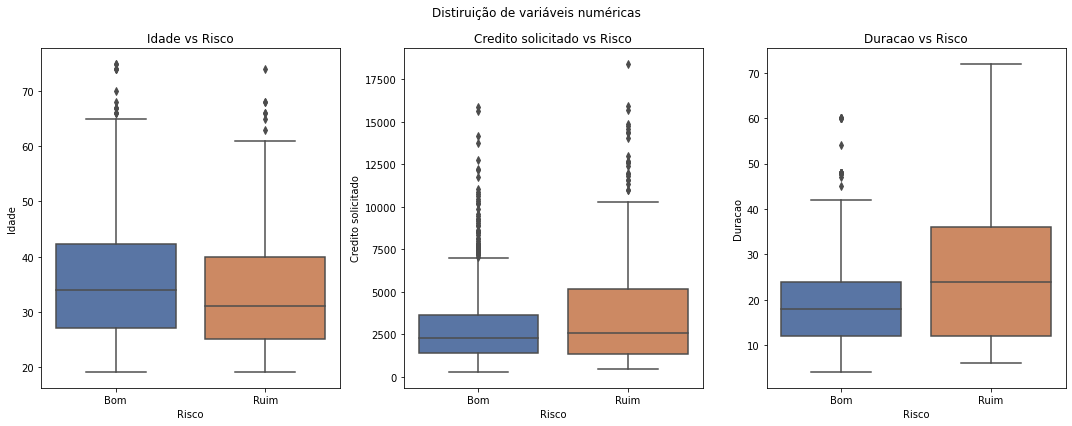

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plt.suptitle('Distiruição de variáveis numéricas')

variaveis_numericas = ['Idade', 'Credito solicitado', 'Duracao']

for i, var in enumerate(variaveis_numericas):
    sns.boxplot(data=novo_df, x='Risco', y=var, ax=axes[i], palette='deep')
    axes[i].set(title=f'{var} vs Risco', xlabel='Risco', ylabel=var)
    
plt.tight_layout()

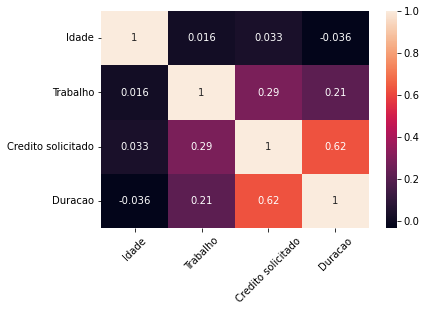

In [22]:
variaveis = ['Idade', 'Trabalho', 'Credito solicitado','Duracao']

matriz_de_correlacao = novo_df[variaveis].corr()

sns.heatmap(data=matriz_de_correlacao, annot=True, xticklabels=variaveis, yticklabels=variaveis)
plt.xticks(rotation=45)

plt.show()

## Pré-processamento dos dados

Aplica função logaritma + 1 nas colunas com variáveis numéricas.

In [23]:
novo_df_log = novo_df.copy()

for var in variaveis_numericas:
    novo_df_log[var] = np.log1p(novo_df_log[var])
    
novo_df_log.head()b

,Unnamed: 0,Idade,Sexo,Trabalho,Residencia,Conta poupanca,Conta corrente,Credito solicitado,Duracao,Motivo,Risco
0,0,4.219508,Masculino,2,Propria,Desconhecido,Pouca,7.064759,1.945910,Radio/TV,Bom
1,1,3.135494,Feminino,2,Propria,Pouca,Media,8.691483,3.891820,Radio/TV,Ruim
2,2,3.912023,Masculino,1,Propria,Pouca,Desconhecido,7.648263,2.564949,Educacao,Bom
3,3,3.828641,Masculino,2,Gratuita,Pouca,Pouca,8.972464,3.761200,Moveis/Equipamentos,Bom
4,4,3.988984,Masculino,2,Gratuita,Pouca,Pouca,8.491055,3.218876,Carro,Ruim


Nota-se que nos gráficos abaixo, após aplicar a função logaritma, o "desenho" dos gráficos ficou mais simétrico, com uma curva lembrando o formato de um sino, uma característica da distribuição padrão.

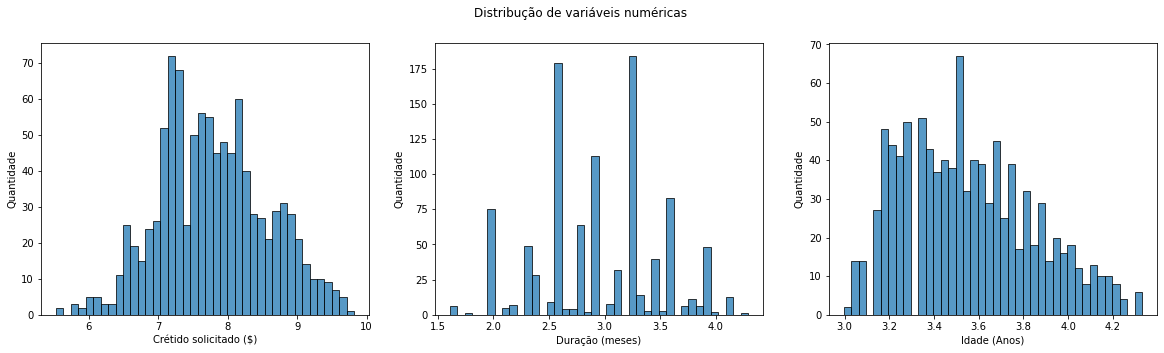

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distribução de variáveis numéricas')

sns.histplot(data=novo_df_log, x='Credito solicitado', ax=axes[0], palette='deep', bins=40)
axes[0].set(xlabel='Crétido solicitado ($)', ylabel='Quantidade')

sns.histplot(data=novo_df_log, x='Duracao', ax=axes[1], palette='deep', bins=40)
axes[1].set(xlabel='Duração (meses)', ylabel='Quantidade')

sns.histplot(data=novo_df_log, x='Idade', ax=axes[2], palette='deep', bins=40)
axes[2].set(xlabel='Idade (Anos)', ylabel='Quantidade')

plt.show()

Utiliza a codificação One-Hot para transformar todas as colunas categóricas em colunas numéricas, importante ressaltar que a variável-alvo do dataset, "Risco" também foi codificada.

In [26]:
variaveis = ['Sexo','Trabalho','Residencia', 'Conta poupanca', 'Conta corrente', 'Motivo', 'Risco']

df_novo_onehot = pd.get_dummies(novo_df_log, columns=variaveis)

df_novo_onehot.head()

,Unnamed: 0,Idade,Credito solicitado,Duracao,Sexo_Feminino,Sexo_Masculino,Trabalho_0,Trabalho_1,Trabalho_2,Trabalho_3,...,Motivo_Carro,Motivo_Concertos,Motivo_Educacao,Motivo_Eletrodomesticos,Motivo_Ferias/Outros,Motivo_Moveis/Equipamentos,Motivo_Negocio,Motivo_Radio/TV,Risco_Bom,Risco_Ruim
0,0,4.219508,7.064759,1.945910,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1,3.135494,8.691483,3.891820,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,2,3.912023,7.648263,2.564949,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3,3.828641,8.972464,3.761200,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,4,3.988984,8.491055,3.218876,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


Remove coluna com id de cada registro do dataset.

In [27]:
df_novo_onehot = df_novo_onehot.iloc[:, 1:]
df_novo_onehot.head()

,Idade,Credito solicitado,Duracao,Sexo_Feminino,Sexo_Masculino,Trabalho_0,Trabalho_1,Trabalho_2,Trabalho_3,Residencia_Aluguel,...,Motivo_Carro,Motivo_Concertos,Motivo_Educacao,Motivo_Eletrodomesticos,Motivo_Ferias/Outros,Motivo_Moveis/Equipamentos,Motivo_Negocio,Motivo_Radio/TV,Risco_Bom,Risco_Ruim
0,4.219508,7.064759,1.945910,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,3.135494,8.691483,3.891820,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3.912023,7.648263,2.564949,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3.828641,8.972464,3.761200,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,3.988984,8.491055,3.218876,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [28]:
df_novo_onehot.columns

Index(['Idade', 'Credito solicitado', 'Duracao', 'Sexo_Feminino',
       'Sexo_Masculino', 'Trabalho_0', 'Trabalho_1', 'Trabalho_2',
       'Trabalho_3', 'Residencia_Aluguel', 'Residencia_Gratuita',
       'Residencia_Propria', 'Conta poupanca_Desconhecido',
       'Conta poupanca_Media', 'Conta poupanca_Muito rica',
       'Conta poupanca_Pouca', 'Conta poupanca_Rica',
       'Conta corrente_Desconhecido', 'Conta corrente_Media',
       'Conta corrente_Pouca', 'Conta corrente_Rica', 'Motivo_Carro',
       'Motivo_Concertos', 'Motivo_Educacao', 'Motivo_Eletrodomesticos',
       'Motivo_Ferias/Outros', 'Motivo_Moveis/Equipamentos', 'Motivo_Negocio',
       'Motivo_Radio/TV', 'Risco_Bom', 'Risco_Ruim'],
      dtype='object')

Aplica a padronização nas variáveis numéricas do dataset, deixando ele com média = 0 e desvio padrão = 1.

In [31]:
from sklearn.preprocessing import StandardScaler

df_novo_onehot_temp = df_novo_onehot.copy()

scaler = StandardScaler()

df_novo_onehot_temp[variaveis_numericas] = scaler.fit_transform(df_novo_onehot_temp[variaveis_numericas])

df_novo_onehot_temp.head()

,Idade,Credito solicitado,Duracao,Sexo_Feminino,Sexo_Masculino,Trabalho_0,Trabalho_1,Trabalho_2,Trabalho_3,Residencia_Aluguel,...,Motivo_Carro,Motivo_Concertos,Motivo_Educacao,Motivo_Eletrodomesticos,Motivo_Ferias/Outros,Motivo_Moveis/Equipamentos,Motivo_Negocio,Motivo_Radio/TV,Risco_Bom,Risco_Ruim
0,2.282879,-0.933992,-1.822056,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-1.438777,1.163149,1.741206,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1.227217,-0.181750,-0.688500,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.940950,1.525385,1.502020,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1.491441,0.904761,0.508940,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


Percebe-se que nos gráficos abaixo, após aplicar a padronização no dataset, o desenho dos gráficos se manteve exatamente o mesmo do anterior, alterando apenas a escala dos valores no eixo x.

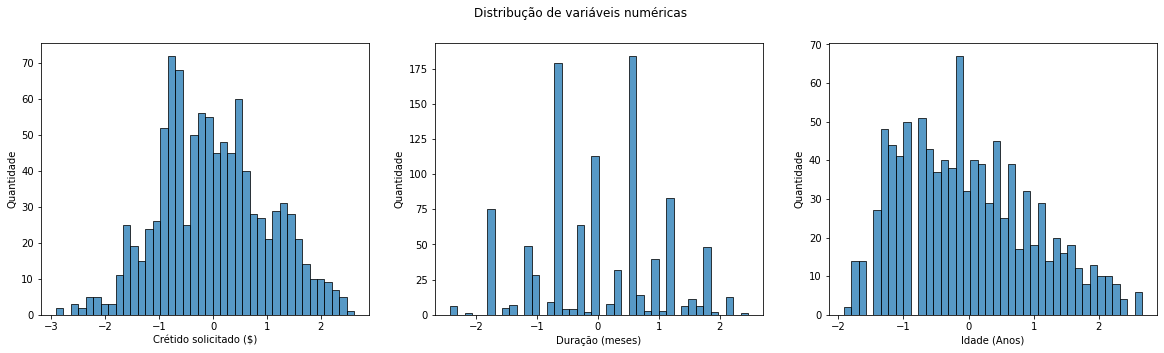

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distribução de variáveis numéricas')

sns.histplot(data=df_novo_onehot_temp, x='Credito solicitado', ax=axes[0], palette='deep', bins=40)
axes[0].set(xlabel='Crétido solicitado ($)', ylabel='Quantidade')

sns.histplot(data=df_novo_onehot_temp, x='Duracao', ax=axes[1], palette='deep', bins=40)
axes[1].set(xlabel='Duração (meses)', ylabel='Quantidade')

sns.histplot(data=df_novo_onehot_temp, x='Idade', ax=axes[2], palette='deep', bins=40)
axes[2].set(xlabel='Idade (Anos)', ylabel='Quantidade')

plt.show()

Clusteriza das variáveis numéricas do dataset

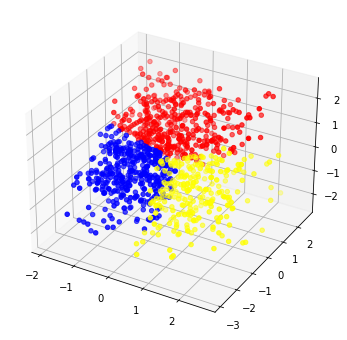

In [33]:
from sklearn.cluster import KMeans

numero_clusters = 3

kmeans = KMeans(n_clusters=numero_clusters, random_state=0, n_init=10)

clusters = kmeans.fit_predict(df_novo_onehot_temp[variaveis_numericas])

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

cores = ['red', 'blue', 'yellow']

for i in range(numero_clusters):
    ax.scatter(df_novo_onehot_temp.loc[clusters == i, 'Idade'],
               df_novo_onehot_temp.loc[clusters == i, 'Credito solicitado'],
               df_novo_onehot_temp.loc[clusters == i, 'Duracao'],
               c=cores[i])
    
plt.show()

df_novo_cluster = df_novo_onehot_temp.copy()

df_novo_cluster['cluster'] = clusters

Coloca nova coluna com cluster no dataset tratado.

In [37]:
df_novo_cluster = df_novo_onehot_temp.copy()

df_novo_cluster['cluster'] = clusters

df_novo_cluster.head()

,Idade,Credito solicitado,Duracao,Sexo_Feminino,Sexo_Masculino,Trabalho_0,Trabalho_1,Trabalho_2,Trabalho_3,Residencia_Aluguel,...,Motivo_Concertos,Motivo_Educacao,Motivo_Eletrodomesticos,Motivo_Ferias/Outros,Motivo_Moveis/Equipamentos,Motivo_Negocio,Motivo_Radio/TV,Risco_Bom,Risco_Ruim,cluster
0,2.282879,-0.933992,-1.822056,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,2
1,-1.438777,1.163149,1.741206,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1.227217,-0.181750,-0.688500,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2
3,0.940950,1.525385,1.502020,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1.491441,0.904761,0.508940,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Coloca nova coluna com cluster no dataset original.

In [38]:
df['clusters'] = clusters

df.head()

,Unnamed: 0,Idade,Sexo,Trabalho,Residencia,Conta poupanca,Conta corrente,Credito solicitado,Duracao,Motivo,Risco,clusters
0,0,67,Masculino,2,Propria,NaN,Pouca,1169,6,Radio/TV,Bom,2
1,1,22,Feminino,2,Propria,Pouca,Media,5951,48,Radio/TV,Ruim,0
2,2,49,Masculino,1,Propria,Pouca,NaN,2096,12,Educacao,Bom,2
3,3,45,Masculino,2,Gratuita,Pouca,Pouca,7882,42,Moveis/Equipamentos,Bom,0
4,4,53,Masculino,2,Gratuita,Pouca,Pouca,4870,24,Carro,Ruim,0


Cria cópia do dataset com todos os tratmentos concluídos.

In [39]:
df_concluido = df_novo_cluster.copy()

df_concluido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Credito solicitado           1000 non-null   float64
 2   Duracao                      1000 non-null   float64
 3   Sexo_Feminino                1000 non-null   uint8  
 4   Sexo_Masculino               1000 non-null   uint8  
 5   Trabalho_0                   1000 non-null   uint8  
 6   Trabalho_1                   1000 non-null   uint8  
 7   Trabalho_2                   1000 non-null   uint8  
 8   Trabalho_3                   1000 non-null   uint8  
 9   Residencia_Aluguel           1000 non-null   uint8  
 10  Residencia_Gratuita          1000 non-null   uint8  
 11  Residencia_Propria           1000 non-null   uint8  
 12  Conta poupanca_Desconhecido  1000 non-null   uint8  
 13  Conta poupanca_Medi

## Aplicação dos modelos de machine learning

Cria os modelos de aprendizado de máquina de KNN e de Regressão logística com a combinação de parâmetros mais eficaz.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Divisão do dataset.
X = df_novo_cluster.drop(['Risco_Bom', 'Risco_Ruim'], axis=1)
y = df_novo_cluster['Risco_Bom']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

# Criacao do modelo de KNN.
knn = KNeighborsClassifier()
parametros_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Encontra os melhores parâmetros para o knn.
gs_knn = GridSearchCV(estimator=knn, param_grid=parametros_knn, cv=5, scoring='accuracy')
gs_knn.fit(X_treino, y_treino)

melhor_knn = gs_knn.best_estimator_

# Cricao de modelo de regressao logistica
lr = LogisticRegression()
parametros_lr = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# Encontra os melhores parâmetros para o modelo de regressao logistica.
gs_lr = GridSearchCV(estimator=lr, param_grid=parametros_lr, cv=5, n_jobs=-1)
gs_lr.fit(X_treino, y_treino)

melhor_lr = gs_lr.best_estimator_

print('Hiperparâmetros KNN', gs_knn.best_params_)
print('Hiperparâmetros Reg. Logistica', gs_lr.best_params_)

Hiperparâmetros KNN {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Hiperparâmetros Reg. Logistica {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Comparação dos resultados dos dois modelos.

In [43]:
from sklearn.metrics import accuracy_score, classification_report

y_prev_knn = melhor_knn.predict(X_teste)
print('Acurácia KNN', accuracy_score(y_teste, y_prev_knn))
print(classification_report(y_teste, y_prev_knn))

y_prev_lr = melhor_lr.predict(X_teste)
print('Acurácia Regressão Logística', accuracy_score(y_teste, y_prev_lr))
print(classification_report(y_teste, y_prev_lr))

Acurácia KNN 0.755
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        59
           1       0.77      0.93      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.65       200
weighted avg       0.74      0.76      0.73       200

Acurácia Regressão Logística 0.765
              precision    recall  f1-score   support

           0       0.65      0.44      0.53        59
           1       0.79      0.90      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200



Verificando acurácia do KNN sem realizar as etapas de pré-processamento dos dados, a única realizada foi One-Hot encoding, pois o KNN roda apenas com variáveis numéricas.

In [46]:
df_temp = df.iloc[:, 1:]
df_temp.head()

variaveis_temp = ['Sexo','Trabalho','Residencia', 'Conta poupanca', 'Conta corrente', 'Motivo', 'Risco']

df_temp = pd.get_dummies(df_temp, columns=variaveis_temp)

X_temp = df_temp.drop(['Risco_Bom', 'Risco_Ruim'], axis=1)
y_temp = df_temp['Risco_Bom']
X_treino_temp, X_teste_temp, y_treino_temp, y_teste_temp = train_test_split(X_temp, y_temp, test_size=.2, random_state=42)

# Criacao do modelo de KNN.
knn_temp = KNeighborsClassifier()
parametros_knn_temp = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Encontra os melhores parâmetros para o knn.
gs_knn_temp = GridSearchCV(estimator=knn_temp, param_grid=parametros_knn_temp, cv=5, scoring='accuracy')
gs_knn_temp.fit(X_treino_temp, y_treino_temp)

melhor_knn_temp = gs_knn_temp.best_estimator_

print('Hiperparâmetros KNN temp', gs_knn_temp.best_params_)

y_prev_knn_temp = melhor_knn_temp.predict(X_teste_temp)

print('Acurácia KNN temp', accuracy_score(y_teste_temp, y_prev_knn_temp))

Hiperparâmetros KNN temp {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Acurácia KNN temp 0.67
